# Machine Learning Demonstrations - 2

To run this notebook, you need to install python dependencies: 

Install tensorflow:

With conda:

```conda install -c anaconda tensorflow-gpu```

With pip:

```pip install tensorflow-gpu```

Other dependencies:

With pip:

```pip install numpy==1.14.0
pip install matplotlib==2.1.1
pip install Keras==2.0.9
pip install scikit_learn==0.19.1```


## Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of features in a dataset, whilst preserving as much information as possible.
By finding a lower-dimensional representation, we reduce the size of the dataset, and can improve both the efficiency and accuracy of machine learning models.

It is also easier to visualize data in very low dimensions (i.e. 2D or 3D), making dimensionality reduction an important tool exploratory data analysis and inference.

Two main techniques of dimensionality reduction are
- Feature selection - finding the best subset of the features
- Feature extraction - transforming the data from high-to-low-dimensional space

Further discussion of dimensionality reduction can be found on the [Wikipedia article](https://en.wikipedia.org/wiki/Dimensionality_reduction).

## MNIST (handwritten digits) database

The Modified National Institute of Standards and Technology (MNIST) database, is a large collection of handwritten digits.

MNIST is commonly used for training and testing image processing systems, particularly in the field of machine learning.

### Load data

In [1]:
/ Utility functions
\l ../utils/funcs.q
\l ../utils/graphics.q

In [2]:
mnist:.p.import[`keras.datasets.mnist][`:load_data;<][]
data:raze(`xtrain`ytrain;`xtest`ytest)!'mnist
@[`data;`xtrain`xtest;%;255];
@[`data;`ytrain`ytest;"f"$];

/home/fionnuala/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/fionnuala/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
2018-04-26 11:00:40.493771: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2018-04-26 11:00:40.600043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:892] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-04-26 11:00

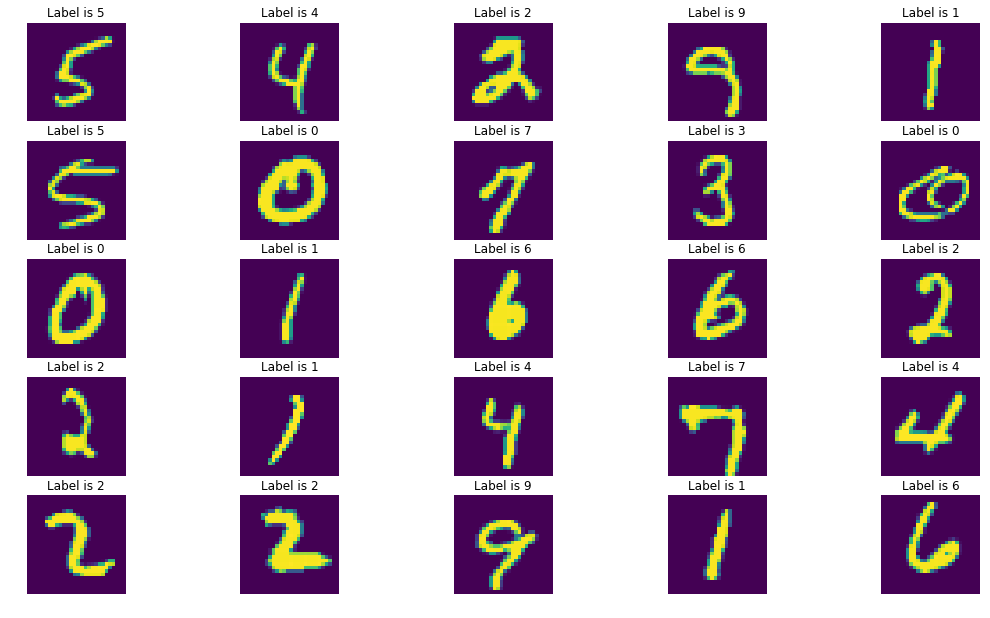

In [3]:
subplots:plt[`:subplots][5;5]
fig:subplots[@;0]
axarr:subplots[@;1]
fig[`:set_size_inches;18.5;10.5];

{ i:rand count data`xtest;
  box:axarr[`$":__getitem__"].p.eval","sv string x;
  box[`:imshow]"f"$data[`xtest]i;
  box[`:axis]`off;
  box[`:set_title]"Label is ",string data[`ytest]i;
 }each cross[til 5;til 5];

plt[`:show][];

## Principal Components Analysis (PCA)

Principal Components Analysis (PCA) is the main *linear* technique for dimensionality reduction. PCA performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized.

The covariance (or correlation) matrix of the data is constructed, the eigen-decomposition is computed, and the eigenvectors corresponding to the largest eigenvalues are selected. These vectors (the Principal Components) are used as a basis for the original data.

The dimension of the dataspace has been reduced, with *some* data loss, but retaining the majority of the variance.

In [4]:
PCA:.p.import[`sklearn.decomposition;`:PCA]
PCA_mod:PCA[`n_components pykw 2;`whiten pykw 1b]
-1"Results of PCA\n";
show resPCA:PCA_mod[`:fit_transform][`X pykw nparray raze each data`xtest]`
-1"\nShape: ",-3!shape resPCA;

Results of PCA

-0.6998543 -1.348295 
0.09881316 1.930834  
-1.591295  0.9015534 
2.136806   -0.2100801
0.2261362  -1.462191 
-1.723457  1.038941  
-0.5990978 -1.066136 
-0.6049173 -0.618633 
0.4347583  -0.3839001
-0.1126765 -1.576311 
1.799294   1.064033  
0.570669   0.3258952 
-0.4019396 -1.923182 
1.709516   -0.1555526
-1.496254  0.8886875 
0.07639513 0.7805226 
0.1467312  -1.799431 
-0.1703725 -1.203355 
0.08249896 0.7406133 
-0.5177526 -1.311759 
-0.69227   -0.7458972
0.3461337  0.07209675
..

Shape: 10000 2


### Visualise PCA

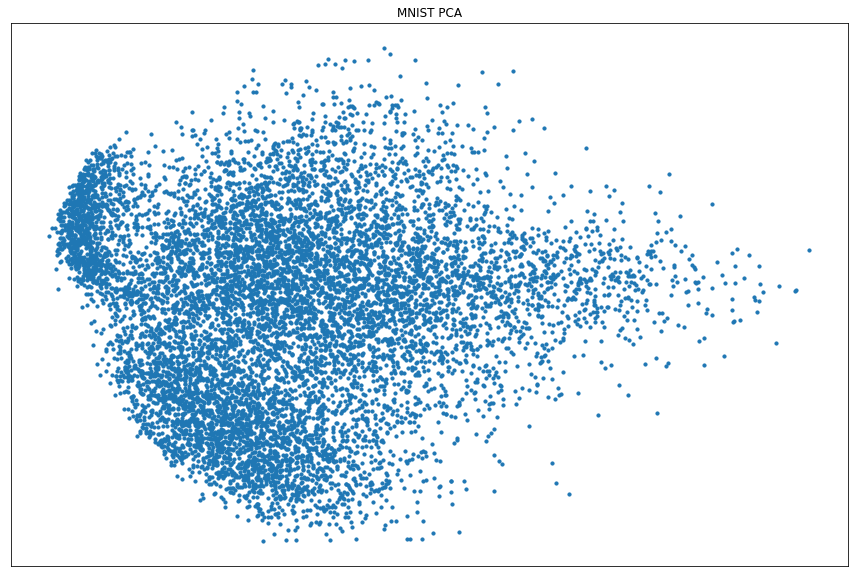

In [5]:
subplots:plt[`:subplots][]

fig:subplots[@;0]
fig[`:set_figheight]10;
fig[`:set_figwidth]15;

axarr:subplots[@;1]
axarr[`:set_title]"MNIST PCA";
axarr[`:scatter][resPCA[;0];resPCA[;1];`s pykw 10];
plt[;*;()]each`:xticks`:yticks;
plt[`:show][];

### Visualise PCA (checking with labels)

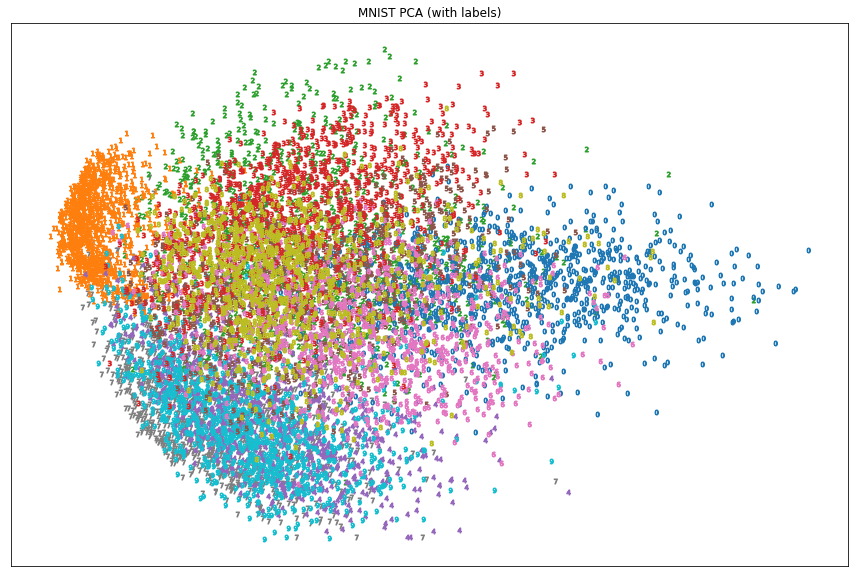

In [6]:
subplots:plt[`:subplots][]

fig:subplots[@;0]
fig[`:set_figheight]10;
fig[`:set_figwidth]15;

axarr:subplots[@;1]
axarr[`:set_title]"MNIST PCA (with labels)";
{i:where data[`ytest]=x;axarr[`:scatter;resPCA[i;0];resPCA[i;1];`s pykw 25;`c pykw"C",string x;`marker pykw"$",string[x],"$"]}each distinct data`ytest;
plt[;()]each`:xticks`:yticks;
plt[`:show][];

## t-distributed Stochastic Neighbor Embedding (t-SNE)

t-distributed stochastic neighbor embedding (t-SNE) is a ML algorithm for *nonlinear* dimensionality reduction. Each high-dimensional point is transformed to a point in 2D or 3D space, such that *similar* points are *close*, and *dissimilar* points are *distant*.

The t-SNE algorithm comprises two stages

1. Constructs a probability distribution over pairs of high-dimensional objects, so that similar objects have a high probability, whilst dissimilar points have a small probability
2. Construct a probability distribution over points in the low-dimensional map, and minimize the Kullback–Leibler divergence between the two distributions, with respect to the locations of the points in the map. 

t-SNE is often used to *visualize* high-level representations of data, such as those learned by an artificial neural network.

In [7]:
manifold:.p.import`sklearn.manifold
tsne:manifold[`:TSNE;`n_components pykw 2;`init pykw `pca;`verbose pykw 1]
-1"Running t-SNE\n";
resTSNE:tsne[`:fit_transform;nparray raze each data`xtest]`
-1"\nResults of t-SNE\n";
show resTSNE;
-1"\nShape: ",-3!shape resTSNE;

Running t-SNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.408s...
[t-SNE] Computed neighbors for 10000 samples in 100.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.030838
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.566513
[t-SNE] Error after 1000 iterations: 1.782969

Results of t-SN

## Visualise t-SNE

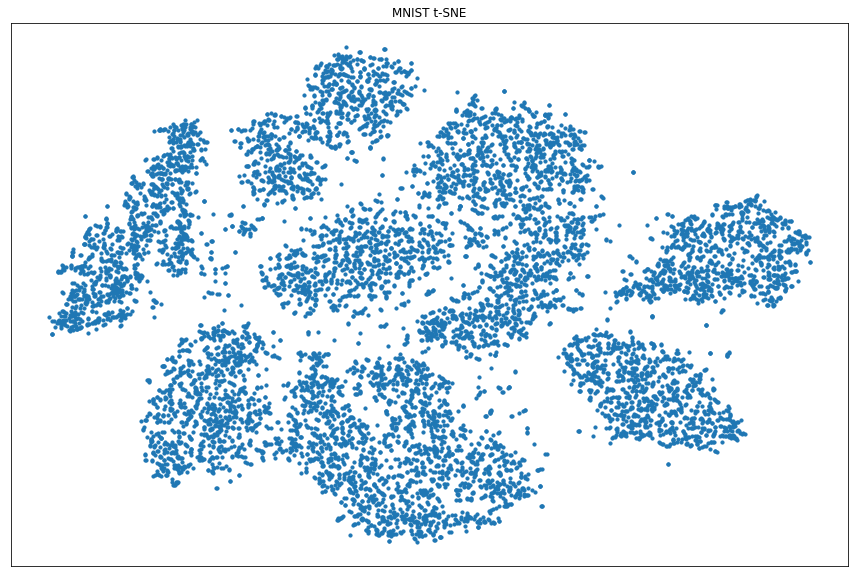

In [8]:
subplots:plt[`:subplots][]

fig:subplots[@;0]
fig[`:set_figheight]10;
fig[`:set_figwidth]15;

axarr:subplots[@;1]
axarr[`:set_title]"MNIST t-SNE";
axarr[`:scatter;resTSNE[;0];resTSNE[;1];`s pykw 10];
plt[;()]each`:xticks`:yticks;
plt[`:show][];

## Visualise t-SNE (checking with labels)

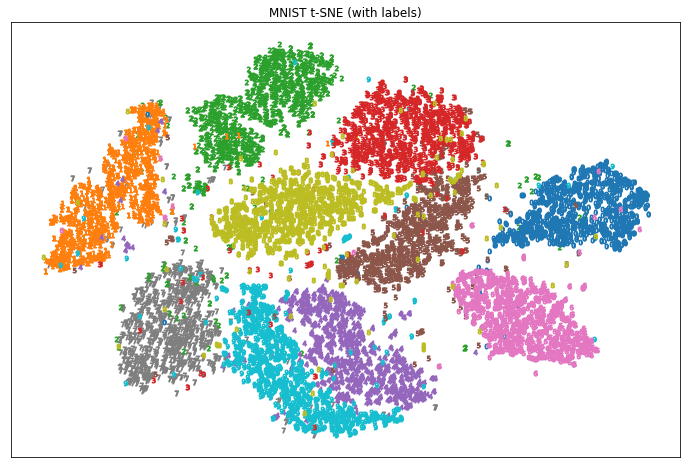

In [9]:
subplots:plt[`:subplots][]

fig:subplots[@;0]
fig[`:set_figheight]8;
fig[`:set_figwidth]12;

axarr:subplots[@;1]
axarr[`:set_title]"MNIST t-SNE (with labels)";
{i:where data[`ytest]=x;axarr[`:scatter;resTSNE[i;0];resTSNE[i;1];`s pykw 25;`c pykw"C",string x;`marker pykw"$",string[x],"$"]}each distinct data`ytest;
plt[;()]each`:xticks`:yticks;
plt[`:show][];